# Multiple correspondence analysis

In this notebook, we will analyze different quantitative data by an MCA. The data are gender, occupation, type (i.e "economist", "jurist" and "economist/jurist"), nationality, and generation.
Multiple Correspondence Analysis is a technique employed for categorical data. This compares all modalities of the variables with individuals and determines the proximity between each modality and each individual. We seek to know if some modalities have similar individuals and if some individuals have the same modalities.
This MCA will be going on the modalities of the variables below:

* Occupations
* Types ("economist", "jurist" and "jurist/economist")
* Genders
* Continents or European regions
* Generations


To realise it, we will use the python MCA tutorial realised by Ricco Rakotomalala (professor at Université Lyon 2), titled "Pratique de l'analyse Factorielle" (available here: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj7_Jzeg-DxAhXryIUKHVwwD3MQFnoECAQQAA&url=http%3A%2F%2Feric.univ-lyon2.fr%2F~ricco%2Fcours%2Fcours%2FPratique_Methodes_Factorielles.pdf&usg=AOvVaw2NsjYlVpBxtSQAJzyBPzpx). This is very well presented and comprehensive. So it is better to read this tutorial first.

In [49]:
# Import packages needed

# Two packages will be necessary to realise the MCA: Fanalysis and Prince (We will explain why before). 
# They both use the Sklearn library to work. It is necessary to install them with Conda or Pip

# cf. https://github.com/OlivierGarciaDev/fanalysis 
# cf. https://github.com/MaxHalford/prince

from fanalysis.mca import MCA
import prince

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## World

We are beginning with the global population (world). But we have only individuals with certain occupations (chosen because of the number of individuals having with these: cf. Analysis of the occupations: https://github.com/Semantic-Data-for-Humanities/Economists_Jurists/blob/main/Notebooks/Analysis_occupations.ipynb).

In [2]:
# Import the file with the variables said above:
D_cont=pd.read_csv('spreadsheets/continent_MCA.csv', header=0, index_col=0, sep="|")

In [3]:
# We reduce the number of modalities from 'occupation' to don't have too much.
D_cont['occupation'].replace(["journalist"],'media person',inplace=True)
D_cont['occupation'].replace(["scientist", "academic","social researcher"],'scientist',inplace=True)
D_cont['occupation'].replace(["banker"],'businessperson',inplace=True)
D_cont['occupation'].replace(["religious", "artist", "soldier", "other", "activist"],'other_occupation',inplace=True)

In [4]:
# Export and save the dataframe modified
D_cont.to_csv('spreadsheets/continent_MCA.csv', sep="|")

In [17]:
# Import the dataframe
D_cont=pd.read_csv('spreadsheets/continent_MCA.csv', header=0, index_col=0, sep="|")

Then, we slice the population into two sub-populations, before and after 1911, corresponding quite well to the XIXth century (before the first World War) and XXth century (before 1951 where we have seen a great drop in the number of individuals on Wikidata. Without a doubt by a less great of individuals recorded on the database cf. https://github.com/Semantic-Data-for-Humanities/Economists_Jurists/blob/main/Notebooks/Sounding_properties_Wikidata.ipynb). It allows modalities to have pretty close with many individuals (some periods possessed too few people).

In [18]:
D_cont['generation'].replace(["1911-1931","1931-1951"],'1911-1951',inplace=True)
D_cont['generation'].replace(["1771-1791","1791-1811","1811-1831","1831-1851", "1851-1871","1871-1891","1891-1911"],'1771-1911',inplace=True)

In [19]:
# We drop the modality 'other' from 'gender' and 'uncoded' from 'continent' because their number of individuals is too few and could bias the analysis.
D_cont=D_cont[D_cont['gender'] != 'other']
D_cont=D_cont[D_cont['continent'] != 'uncoded']
D_cont=D_cont[D_cont['generation'] != '1951-1971']

In [20]:
#Check some modalities
print(len(D_cont[D_cont['generation'] == '1911-1951']))
print(len(D_cont[D_cont['generation'] == '1771-1911']))
print(len(D_cont[D_cont['occupation'] == 'teacher']))

16066
20986
581


In [21]:
# Keep only columns we need
D_cont=D_cont[["type","gender","occupation","generation","continent"]]

In [22]:
# p correspond to the shape of variables
# n correspond to the shape of individuals
p = D_cont.shape[1]
n =  D_cont.shape[0]

In [23]:
# code the modalities into 0/1 (Burt table)
X = pd.get_dummies(D_cont,prefix='',prefix_sep='')
#print(X)

In [24]:
# number of modalities of all variables
M = X.shape[1]
print(M)

23


In [25]:
# Instantiation
mca_con = MCA(row_labels=D_cont.index,var_labels=D_cont.columns)
mca_con.fit(D_cont.values)

MCA(row_labels=Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            51148, 51149, 51151, 51152, 51158, 51159, 51163, 51164, 51165,
            51166],
           dtype='int64', length=37052),
    var_labels=Index(['type', 'gender', 'occupation', 'generation', 'continent'], dtype='object'))

In [26]:
# Count the profile average individual
ind_mean= np.sum(X.values,axis=0)/(n*p)
ind_mean

array([0.03627874, 0.16043938, 0.00328187, 0.00821548, 0.19178452,
       0.00181907, 0.00733564, 0.01052035, 0.01766706, 0.11008313,
       0.03363921, 0.00313613, 0.01579942, 0.11327864, 0.08672136,
       0.00314153, 0.01071467, 0.00159236, 0.08061643, 0.00615891,
       0.07378819, 0.00267732, 0.02131059])

In [27]:
# the sum of the profil indivual moyen is well equal to 1. 
np.sum(ind_mean)

1.0

In [28]:
# chi-squared distance between the first and the second individual
print(np.sum(1/ind_mean*(X.values[0,:]/p-X.values[1,:]/p)**2))

5.816194738486259


In [29]:
# chi-squared distance between the first and the last individual
print(np.sum(1/ind_mean*(X.values[0,:]/p-X.values[14956,:]/p)**2))

1.8526278914971073


In [30]:
# distance to the origine of the first individual
print(np.sum(1/ind_mean*(X.values[0,:]/p-ind_mean)**2))

0.824584053216732


In [31]:
# distance to the origine of the second individual
print(np.sum(1/ind_mean*(X.values[1,:]/p-ind_mean)**2))

5.91405524556197


In [32]:
# distance to the origine of the last individual
print(np.sum(1/ind_mean*(X.values[37051,:]/p-ind_mean)**2))

4.015690873019238


**note:** These calculations are a few examples (the number of individuals is too high and we don't know the label of the people). But, as can be seen, the three are quite different and the first is a lot of closer from the average individual.

In [33]:
# distance from true origin for each individual
dist_ind = np.apply_along_axis(arr=X.values,axis=1,func1d=lambda x:np.sum(1/ind_mean*(x/p-ind_mean)**2))

In [34]:
# weigth of the individuals
weigth_ind = np.ones(X.shape[0])/n

In [35]:
#inertia
inertia_ind = weigth_ind*dist_ind

In [36]:
# Display of the three indicators for each individual
print(pd.DataFrame(np.transpose([weigth_ind,dist_ind,inertia_ind]),index=D_cont.index))

              0          1         2
1      0.000027   0.824584  0.000022
2      0.000027   5.914055  0.000160
3      0.000027   2.503570  0.000068
4      0.000027   1.542175  0.000042
5      0.000027   1.542175  0.000042
...         ...        ...       ...
51159  0.000027   3.907555  0.000105
51163  0.000027  15.222814  0.000411
51164  0.000027  13.868397  0.000374
51165  0.000027  13.015138  0.000351
51166  0.000027   4.015691  0.000108

[37052 rows x 3 columns]


In [37]:
# total inertia
inertia_tot_ind = np.sum(inertia_ind)
print("the total information is equal to",inertia_tot_ind)

the total information is equal to 3.6000000000000005


In [38]:
# number of maximum factor (factor = principal axis)
Hmax = M-p
print(Hmax)

18


In [39]:
# Counts the eigenvectors (percentage and cumulative percentage)
print(pd.DataFrame(np.transpose(mca_con.eig_),columns=['eigenvect.','%','Cumul. %'],index=range(1,Hmax+1)))

    eigenvect.         %    Cumul. %
1     0.331303  9.202861    9.202861
2     0.244515  6.792089   15.994950
3     0.229586  6.377386   22.372336
4     0.214288  5.952441   28.324777
5     0.209450  5.818046   34.142823
6     0.204834  5.689840   39.832662
7     0.203748  5.659659   45.492322
8     0.201795  5.605429   51.097750
9     0.199668  5.546342   56.644092
10    0.198388  5.510768   62.154859
11    0.196630  5.461947   67.616806
12    0.191097  5.308264   72.925070
13    0.189041  5.251135   78.176205
14    0.186167  5.171295   83.347499
15    0.182050  5.056943   88.404442
16    0.151793  4.216466   92.620908
17    0.139029  3.861930   96.482838
18    0.126618  3.517162  100.000000


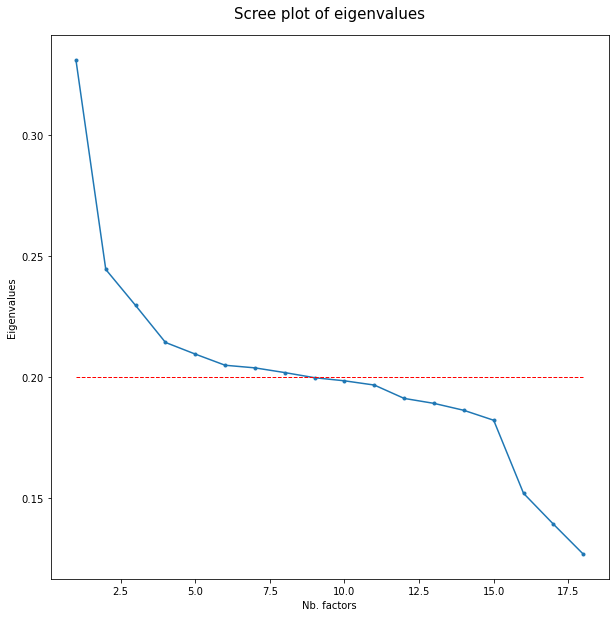

In [40]:
import matplotlib.pyplot as plt
# scree plot of eigenvalues
fix,ax = plt.subplots(figsize=(10,10))
ax.plot(range(1,Hmax+1),mca_con.eig_[0],".-")
ax.set_xlabel("Nb. factors", fontsize=10)
ax.set_ylabel("Eigenvalues", fontsize=10)
plt.title("Scree plot of eigenvalues",  fontsize=15, y=1.02)
# threshold - Kaiser rule
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

**Comment**: As we can see, the optimal number of factors seem to be 8 (reached to 0.2 of eigenvalues). But, usually, we must apply the Benzécri's correction to focus the inertia on the first factors. In the MCA, there is lot of redundancy of the information, the Benzecri correction permits to adjust the redundancy.

In [41]:
# get the eigenvalues superior to (1/p)
lambada = mca_con.eig_[0][mca_con.eig_[0]>1/p]
print(lambada)

[0.331303   0.2445152  0.2295859  0.21428787 0.20944965 0.20483423
 0.20374773 0.20179543]


In [42]:
# apply the Benzecri correction
lambada_prim = ((p/(p-1))*(lambada-1/p))**2
print(lambada_prim)

[2.69382472e-02 3.09625496e-03 1.36769570e-03 3.18973796e-04
 1.39524733e-04 3.65152443e-05 2.19460950e-05 5.03682264e-06]


In [43]:
# sum the correction
S_prim = np.sum(lambada_prim)
print(S_prim)

0.031924194556049015


In [44]:
# percentage of the correction
percent_prim = lambada_prim/S_prim*100

In [45]:
# display the new eigenvalues with Benzécri's correction
print(pd.DataFrame(np.transpose(np.array([lambada_prim,percent_prim,np.cumsum(percent_prim)])),columns=['eigenvect','%','Cumul %'],index=range(1,9)))

   eigenvect          %     Cumul %
1   0.026938  84.381917   84.381917
2   0.003096   9.698772   94.080689
3   0.001368   4.284198   98.364887
4   0.000319   0.999160   99.364047
5   0.000140   0.437050   99.801097
6   0.000037   0.114381   99.915478
7   0.000022   0.068744   99.984223
8   0.000005   0.015777  100.000000


In [46]:
t=pd.DataFrame(np.transpose(np.array([lambada_prim,percent_prim,np.cumsum(percent_prim)])),columns=['eigenvect','%','Cumul %'],index=range(1,9))

**Comments:** here, with the Benzécri's correction, the result is completely different, the first factor catchs almost the entire information (84.38%). 

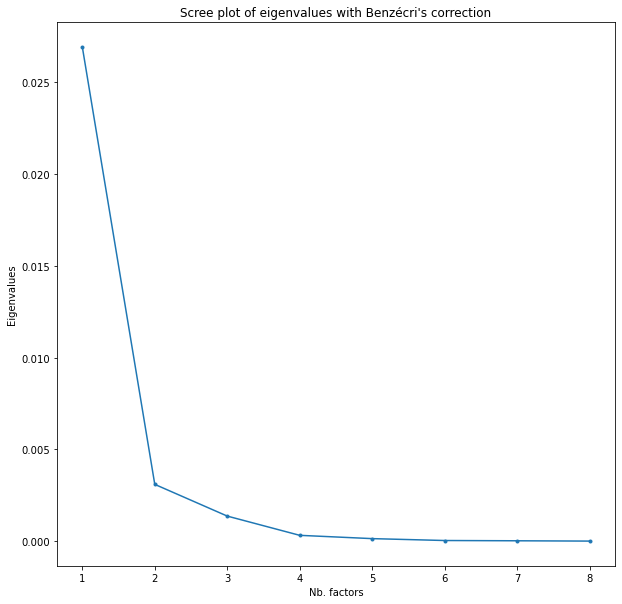

In [47]:
# Scree plot of eigenvalues with Benzécri's correction
plot_ben = t['eigenvect']
plot_ben_per = t['%']

fix,ax = plt.subplots(figsize=(10,10))
ax.plot(plot_ben,".-")
ax.set_xlabel("Nb. factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree plot of eigenvalues with Benzécri's correction")

plt.show()

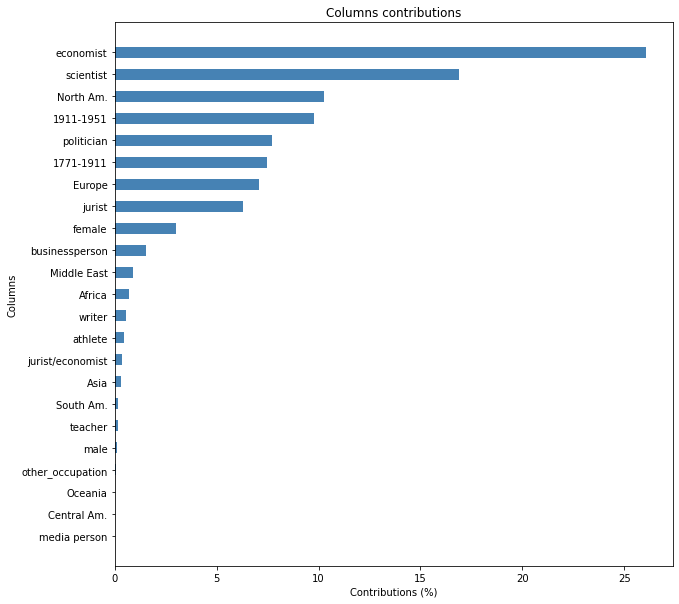

In [188]:
# plot of the modalities contributions on the first axis
mca_con.plot_col_contrib(num_axis=1, figsize=(10,10))

**Comments**: The "economist" modality brings the greatest contribution on the first axis. "Scientist", "North America" and "1911-1951" are very well represented. The contribution allows the axis construction. A high contribution can come from two reasons: the modality has a large number of individuals having this. Or that modality is quite rare and possessed by a type of individual.

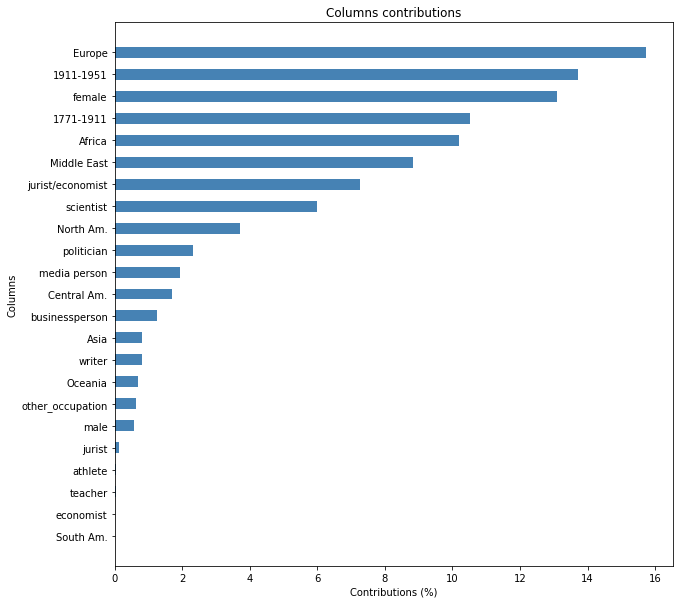

In [189]:
# plot of the modalities contributions on the second axis
mca_con.plot_col_contrib(num_axis=2, figsize=(10,10))

**Comments**: Now, on the second axis, the contribution is not the same at all. "Europe" brings the best contribution ("economist" almost none). "1911-1951", "female" and "1771-1911" are well represented

It is also possible to realize the same plots to the individuals. But the huge number of individuals and the very long IT runtime avoid us making it.

## Plot with individuals and modalities coordinates (Prince library)

To realize a plot with individuals and modalities coordinates, we must change of library because Prince uses less computational time. Also, it is possible to display the dots of the individuals, unlike the other library. As we have seen with Benzécri's correction, we need only the two first axes to represent the coordinates. For this reason, in the 'n_components' option of the Prince library, we put two.

In [51]:
mca_cont = prince.MCA(n_components=2, n_iter=5,copy=True, check_input=True, engine='auto',random_state=42)

In [52]:
mca_cont = mca_cont.fit(D_cont)

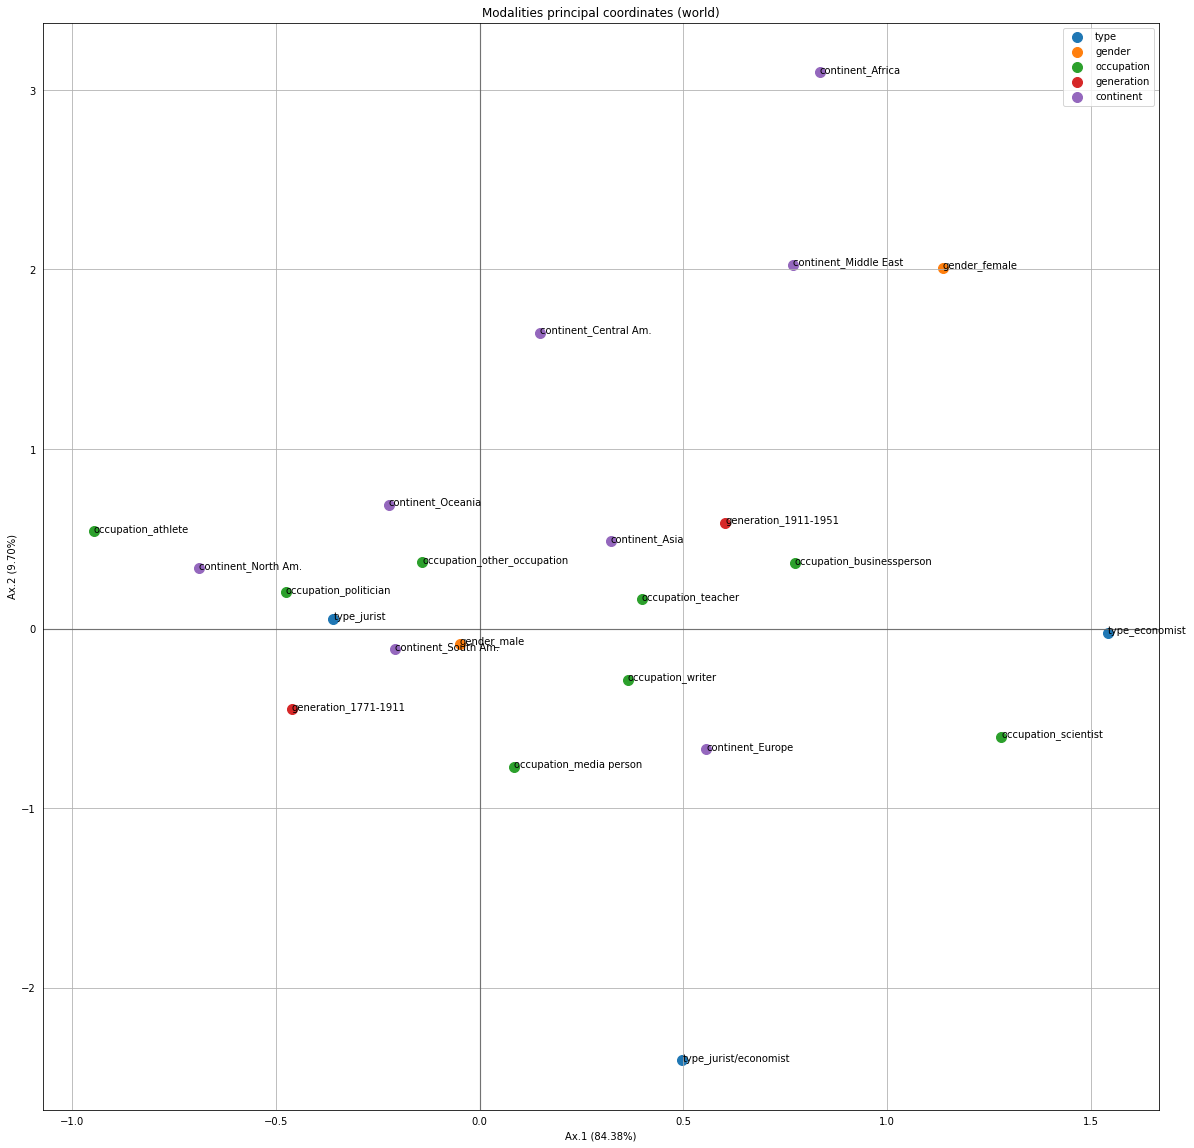

In [53]:
ax = mca_cont.plot_coordinates(X=D_cont, ax=None, figsize=(20, 20),
                         show_row_points=False, row_points_size=10,
                         row_points_alpha=0.5, show_row_labels=False,
                         show_column_points=True, column_points_size=100, show_column_labels=True,
                         legend_n_cols=1)
ax.set_title('Modalities principal coordinates (world)')
ax.set_xlabel("Ax.1 (84.38%)")
ax.set_ylabel("Ax.2 (9.70%)")
plt.show()

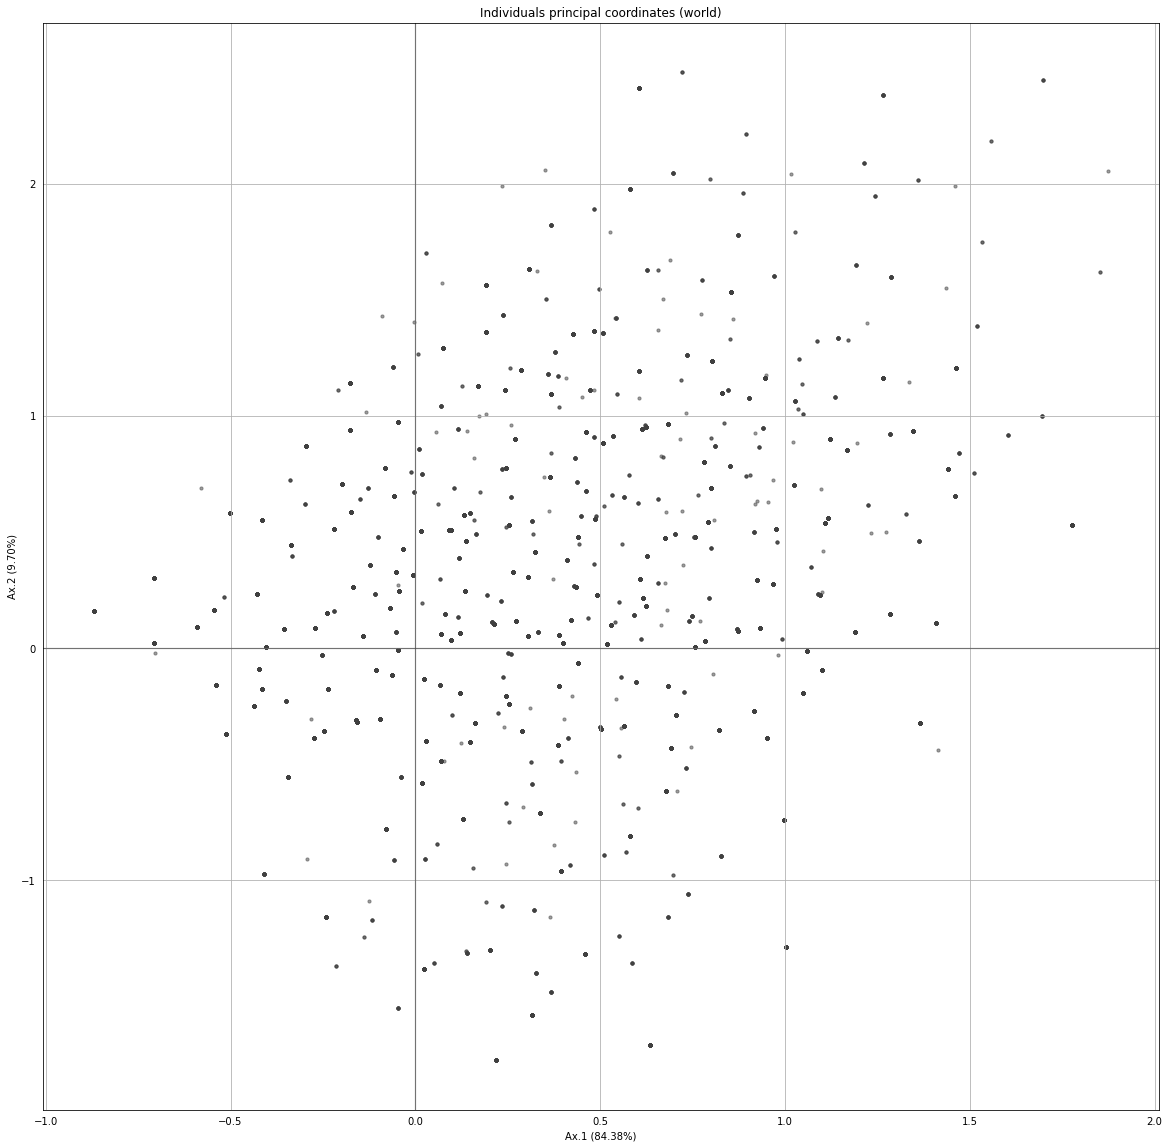

In [54]:
ax = mca_cont.plot_coordinates(X=D_cont, ax=None, figsize=(20, 20),
                         show_row_points=True, row_points_size=10,
                         row_points_alpha=0.5, show_row_labels=False,
                         show_column_points=False, column_points_size=100, show_column_labels=False,
                         legend_n_cols=1)
ax.set_title('Individuals principal coordinates (world)')
ax.set_xlabel("Ax.1 (84.38%)")
ax.set_ylabel("Ax.2 (9.70%)")
plt.show()

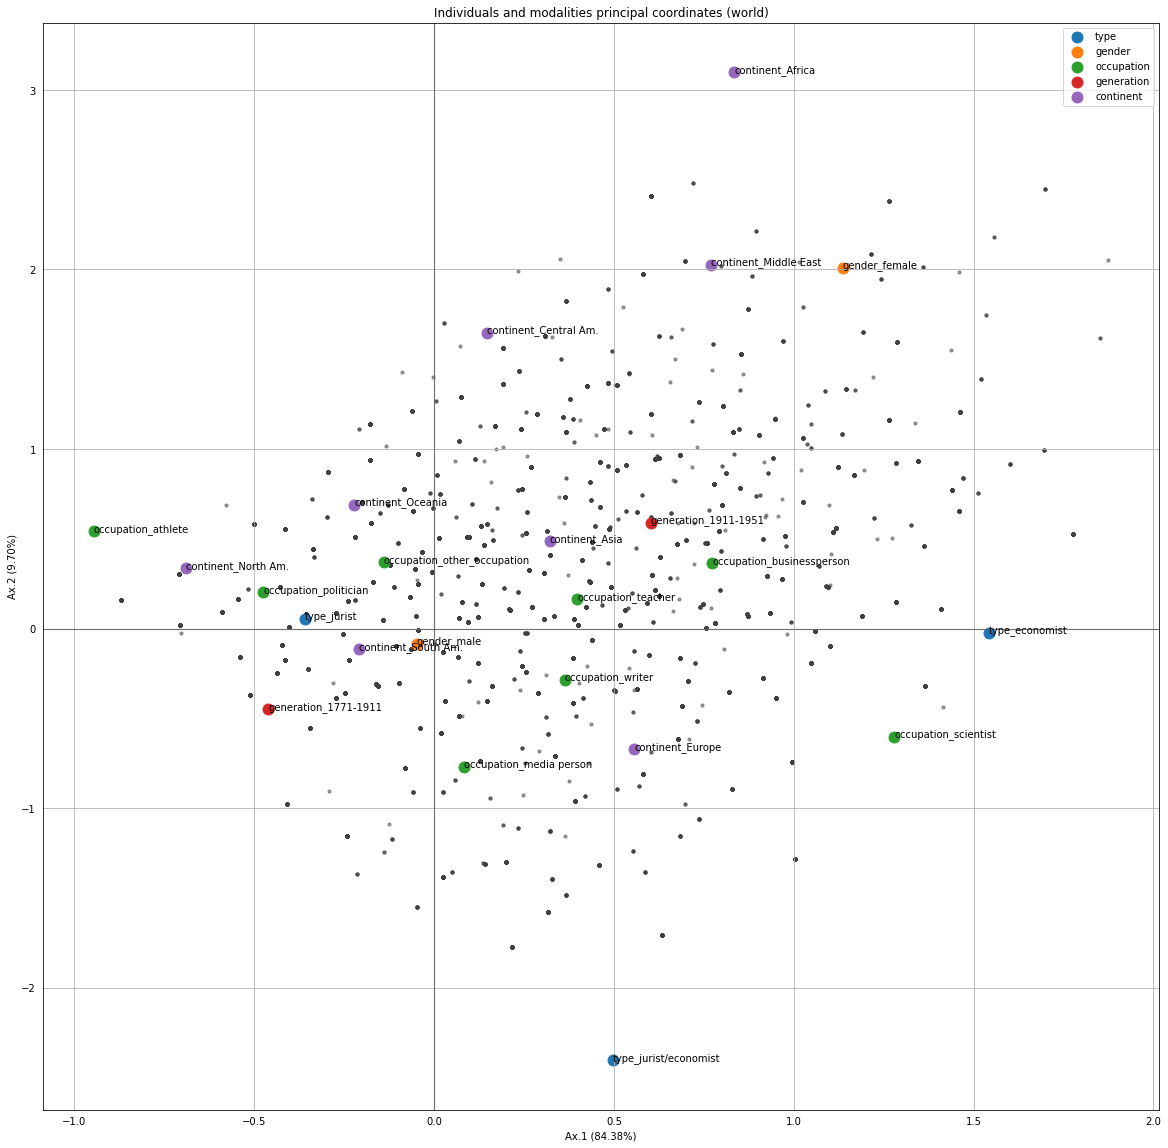

In [57]:
### ax = mca_cont.plot_coordinates(X=D_cont, ax=None, figsize=(20, 20),
                         show_row_points=True, row_points_size=10,
                         row_points_alpha=0.5, show_row_labels=False,
                         show_column_points=True, column_points_size=120, show_column_labels=True,
                         legend_n_cols=1)
ax.set_title('Individuals and modalities principal coordinates (world)')
ax.set_xlabel("Ax.1 (84.38%)")
ax.set_ylabel("Ax.2 (9.70%)")
plt.show()

**Comments**: The representation of the modalities and the individuals permits us to see a lot of proximities between modalities.

* First, no real individuals clusters appear. This signifies that the individuals share the modalities in a heterogeneous way.
* Some individuals share the same modalities. A great number of people contribute to the smoothing.
* Then, for the modalities, the "North America" ​​modality is close to the "athlete" modality (The encouragement to do sport at American universities could explain it) and "politician" modality; the "politician" modality itself is very "close" to the "jurist" modality.
* The "jurist" modality is opposite to the "economist" modality. The "jurist/economist" type is very far to the center (The few individuals have this modality). The gravity center is more around the "jurist" type.
* The XIXth century is the opposite of the XXth century. The XXth century is quite close to the "businessperson" modality.
* The gender "male" is at the center of the graph because the population majority is composed of males.



--------------------------------------------------------------------------------



## Europe

We will realise the exact same analysis on Europe. The European region are the same that in the notebook of the nationality analysis (cf. https://github.com/Semantic-Data-for-Humanities/Economists_Jurists/blob/main/Notebooks/Analysis_nationalities_wikidata.ipynb) 

In [61]:
D_euro=pd.read_csv('spreadsheets/europe_MCA.csv', sep="|")

In [62]:
D_euro=D_euro[["type","gender","occupation","generation","region"]]
# Like above, we change some modalities for the analysis, "athlete" modality has too few number of individuals in Europe.
D_euro['occupation'].replace(["athlete", "other", "activist"],'other_occupation',inplace=True)
D_euro

,type,gender,occupation,generation,region
0,economist,male,politician,1911-1931,Eastern Europe
1,economist,male,scientist,1891-1911,Central Europe
2,jurist,male,scientist,1911-1931,Central Europe
3,jurist,male,politician,1851-1871,British Isles
4,jurist,male,media person,1851-1871,British Isles
...,...,...,...,...,...
14952,jurist,male,businessperson,1931-1951,Southern Europe
14953,economist,male,politician,1931-1951,Southern Europe
14954,jurist,male,writer,1931-1951,Southern Europe
14955,jurist,male,politician,1931-1951,Southern Europe


In [63]:
# Here too, we create to sub-population, before and after 1911.
D_euro['generation'].replace(["1911-1931","1931-1951"],'1911-1951',inplace=True)
D_euro['generation'].replace(["1771-1791","1791-1811","1811-1831","1831-1851", "1851-1871","1871-1891","1891-1911"],'1771-1911',inplace=True)

In [64]:
# p correspond to the shape of variables
# n correspond to the shape of individuals
p = D_euro.shape[1]
n =  D_euro.shape[0]

In [65]:
# code the modalities into 0/1 
X = pd.get_dummies(D_euro,prefix='',prefix_sep='')
#print(X)

In [66]:
# number of modalities 
M = X.shape[1]
print(M)

21


In [67]:
mca_euro = MCA(row_labels=D_euro.index,var_labels=D_euro.columns)

In [68]:
mca_euro.fit(D_euro.values)

MCA(row_labels=RangeIndex(start=0, stop=14957, step=1),
    var_labels=Index(['type', 'gender', 'occupation', 'generation', 'region'], dtype='object'))

In [69]:
# Count the profile average individual
ind_mean= np.sum(X.values,axis=0)/(n*p)
ind_mean

array([0.05164137, 0.14322391, 0.00513472, 0.00814334, 0.19185666,
       0.00710035, 0.01254262, 0.0194424 , 0.08731698, 0.04877984,
       0.00402487, 0.02079294, 0.11674801, 0.08325199, 0.01889416,
       0.06546767, 0.01884068, 0.01192753, 0.01773083, 0.03941967,
       0.02771946])

In [70]:
# the sum of the profil indivual moyen is well equal to 1. 
np.sum(ind_mean)

1.0

In [76]:
# chi-squared distance between the first and the second individual
print(np.sum(1/ind_mean*(X.values[0,:]/p-X.values[1,:]/p)**2))

4.835253860987487


In [77]:
# chi-squared distance between the first and the last individual
print(np.sum(1/ind_mean*(X.values[0,:]/p-X.values[14956,:]/p)**2))

7.001782146065303


In [78]:
# distance to the origine of the first individual
print(np.sum(1/ind_mean*(X.values[0,:]/p-ind_mean)**2))

3.0446978254376655


In [79]:
# distance to the origine of the second individual
print(np.sum(1/ind_mean*(X.values[1,:]/p-ind_mean)**2))

1.7566795320300763


In [80]:
# distance to the origine of the last individual
print(np.sum(1/ind_mean*(X.values[14956,:]/p-ind_mean)**2))

3.3350002985795726


**note:** These calculations are a few examples (the individuals' number is too high. We don't know the people's label). As we can see, the first and the last individual are quite close and further away from the average individual than the second individual.

In [81]:
dist_ind = np.apply_along_axis(arr=X.values,axis=1,func1d=lambda x:np.sum(1/ind_mean*(x/p-ind_mean)**2))

In [82]:
weigth_ind = np.ones(X.shape[0])/n

In [83]:
inertia_ind = weigth_ind*dist_ind

In [84]:
print(pd.DataFrame(np.transpose([weigth_ind,dist_ind,inertia_ind]),index=D_euro.index))

              0         1         2
0      0.000067  3.044698  0.000204
1      0.000067  1.756680  0.000117
2      0.000067  1.399240  0.000094
3      0.000067  2.405547  0.000161
4      0.000067  5.136572  0.000343
...         ...       ...       ...
14952  0.000067  6.616484  0.000442
14953  0.000067  1.936354  0.000129
14954  0.000067  2.906693  0.000194
14955  0.000067  1.441064  0.000096
14956  0.000067  3.335000  0.000223

[14957 rows x 3 columns]


In [85]:
inertia_tot_ind = np.sum(inertia_ind)
print("the total information is equal to",inertia_tot_ind,".")

the total information is equal to 3.2 .


In [86]:
# number of maximum factor
Hmax = M-p
print(Hmax)

16


In [87]:
# Counts the eigenvectors
print(pd.DataFrame(np.transpose(mca_euro.eig_),columns=['eigenvect.','%','Cumul. %'],index=range(1,Hmax+1)))

    eigenvect.         %    Cumul. %
1     0.296975  9.280455    9.280455
2     0.229658  7.176806   16.457261
3     0.228918  7.153684   23.610945
4     0.221979  6.936834   30.547779
5     0.215511  6.734716   37.282495
6     0.207853  6.495399   43.777894
7     0.202273  6.321032   50.098926
8     0.201684  6.302630   56.401556
9     0.196610  6.144072   62.545628
10    0.194275  6.071080   68.616708
11    0.190163  5.942592   74.559301
12    0.184476  5.764881   80.324182
13    0.181325  5.666409   85.990591
14    0.169707  5.303340   91.293931
15    0.153029  4.782146   96.076077
16    0.125566  3.923923  100.000000


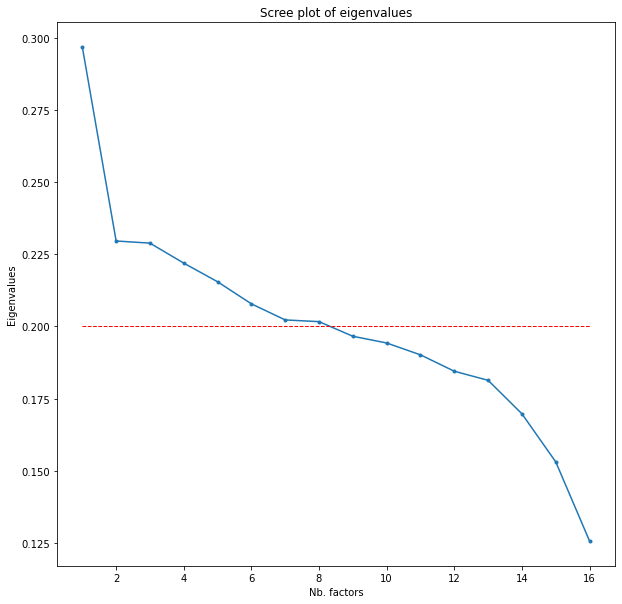

In [88]:
import matplotlib.pyplot as plt
# scree plot of eigenvalues
fix,ax = plt.subplots(figsize=(10,10))
ax.plot(range(1,Hmax+1),mca_euro.eig_[0],".-")
ax.set_xlabel("Nb. factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree plot of eigenvalues")
# threshold - Kaiser rule
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

**Comment**: As we can see, the optimal number of factors seem to be 8 (reached to 0.2 of eigenvalues). But, usually, we must apply the Benzécri's correction to focus the inertia on the first factors. In the MCA, there is lot of redundancy of the information, the Benzécri's correction permits to adjust the redundancy.

In [89]:
# get the eigenvalues superior to (1/p)
lambada = mca_euro.eig_[0][mca_euro.eig_[0]>1/p]
print(lambada)

[0.29697455 0.22965779 0.22891788 0.2219787  0.21551093 0.20785277
 0.20227303 0.20168416]


In [90]:
# apply the Benzecri correction
lambada_prim = ((p/(p-1))*(lambada-1/p))**2
print(lambada_prim)

[1.46938496e-02 1.37435123e-03 1.30663072e-03 7.54786437e-04
 3.75920069e-04 9.63530756e-05 8.07288252e-06 4.43184541e-06]


In [91]:
# sum the correction
S_prim = np.sum(lambada_prim)
print(S_prim)

0.018614395839538167


In [92]:
# percentage of the correction
percent_prim = lambada_prim/S_prim*100

In [93]:
# display the new eigenvalues
print(pd.DataFrame(np.transpose(np.array([lambada_prim,percent_prim,np.cumsum(percent_prim)])),columns=['eigenvect','%','Cumul %'],index=range(1,9)))

   eigenvect          %     Cumul %
1   0.014694  78.938096   78.938096
2   0.001374   7.383271   86.321366
3   0.001307   7.019463   93.340830
4   0.000755   4.054853   97.395683
5   0.000376   2.019513   99.415196
6   0.000096   0.517627   99.932822
7   0.000008   0.043369   99.976191
8   0.000004   0.023809  100.000000


In [94]:
g=pd.DataFrame(np.transpose(np.array([lambada_prim,percent_prim,np.cumsum(percent_prim)])),columns=['eigenvect','%','Cumul %'],index=range(1,9))

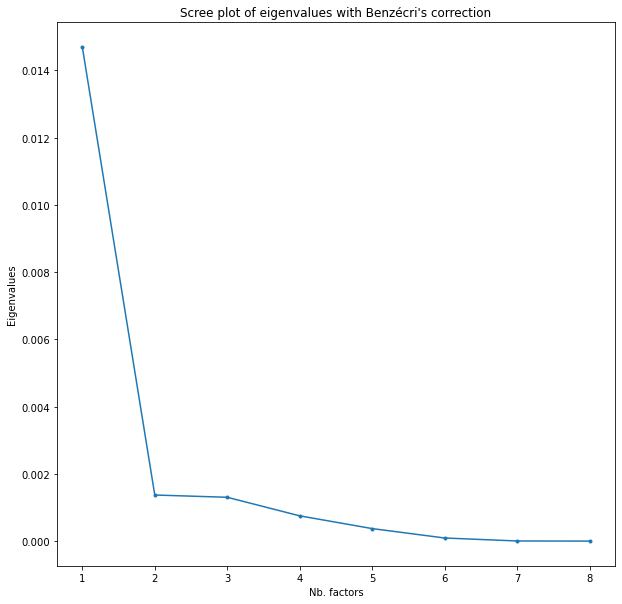

In [95]:
# Scree plot of eigenvalues with Benzécri's correction
plot_ben = g['eigenvect']
fix,ax = plt.subplots(figsize=(10,10))
ax.plot(plot_ben,".-")
ax.set_xlabel("Nb. factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree plot of eigenvalues with Benzécri's correction")

plt.show()

**Comments:** here, with the Benzécri's correction, the result is completely different, the first factor catchs almost the entire information (78.94%).

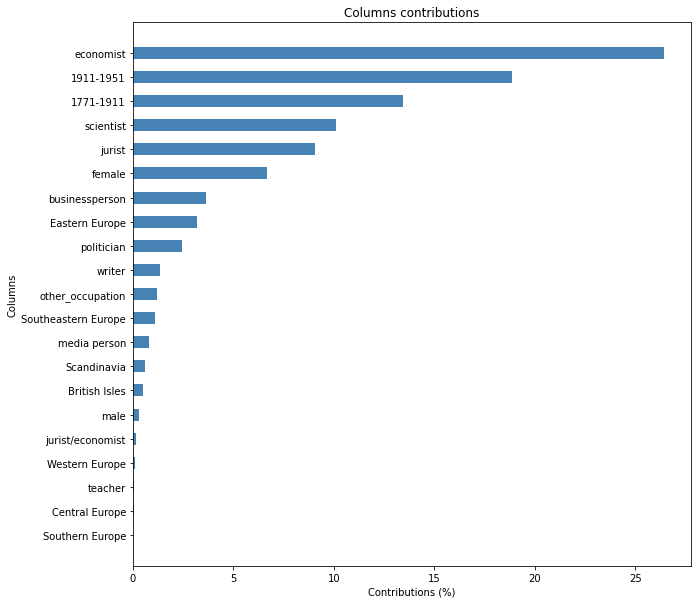

In [313]:
# plot of the modalities contributions on the first axis
mca_euro.plot_col_contrib(num_axis=1, figsize=(10,10))

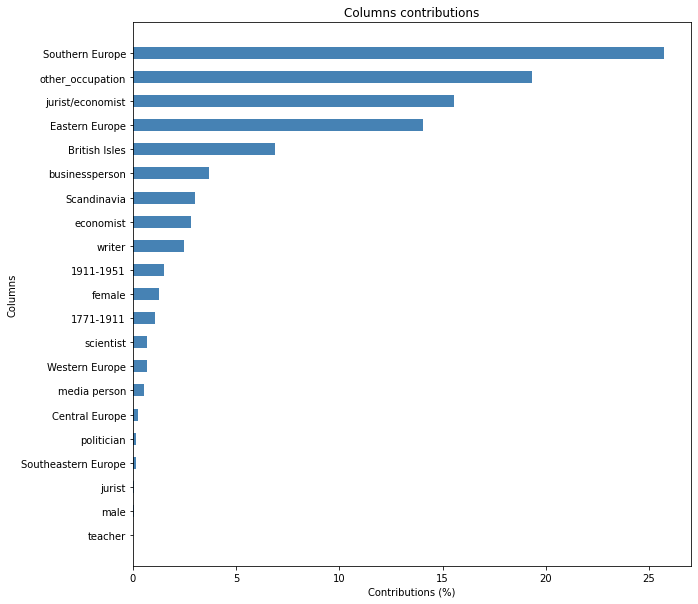

In [314]:
# plot of the modalities contributions on the second axis
mca_euro.plot_col_contrib(num_axis=2, figsize=(10,10))

## Plot with individuals and modalities coordinates

In [96]:
mca_eu = prince.MCA(n_components=2, n_iter=5,copy=True, check_input=True, engine='auto',random_state=42)

In [97]:
D_euro=D_euro[["type","gender","occupation","generation","region"]]
D_euro

,type,gender,occupation,generation,region
0,economist,male,politician,1911-1951,Eastern Europe
1,economist,male,scientist,1771-1911,Central Europe
2,jurist,male,scientist,1911-1951,Central Europe
3,jurist,male,politician,1771-1911,British Isles
4,jurist,male,media person,1771-1911,British Isles
...,...,...,...,...,...
14952,jurist,male,businessperson,1911-1951,Southern Europe
14953,economist,male,politician,1911-1951,Southern Europe
14954,jurist,male,writer,1911-1951,Southern Europe
14955,jurist,male,politician,1911-1951,Southern Europe


In [98]:
mca_eu = mca_eu.fit(D_euro)

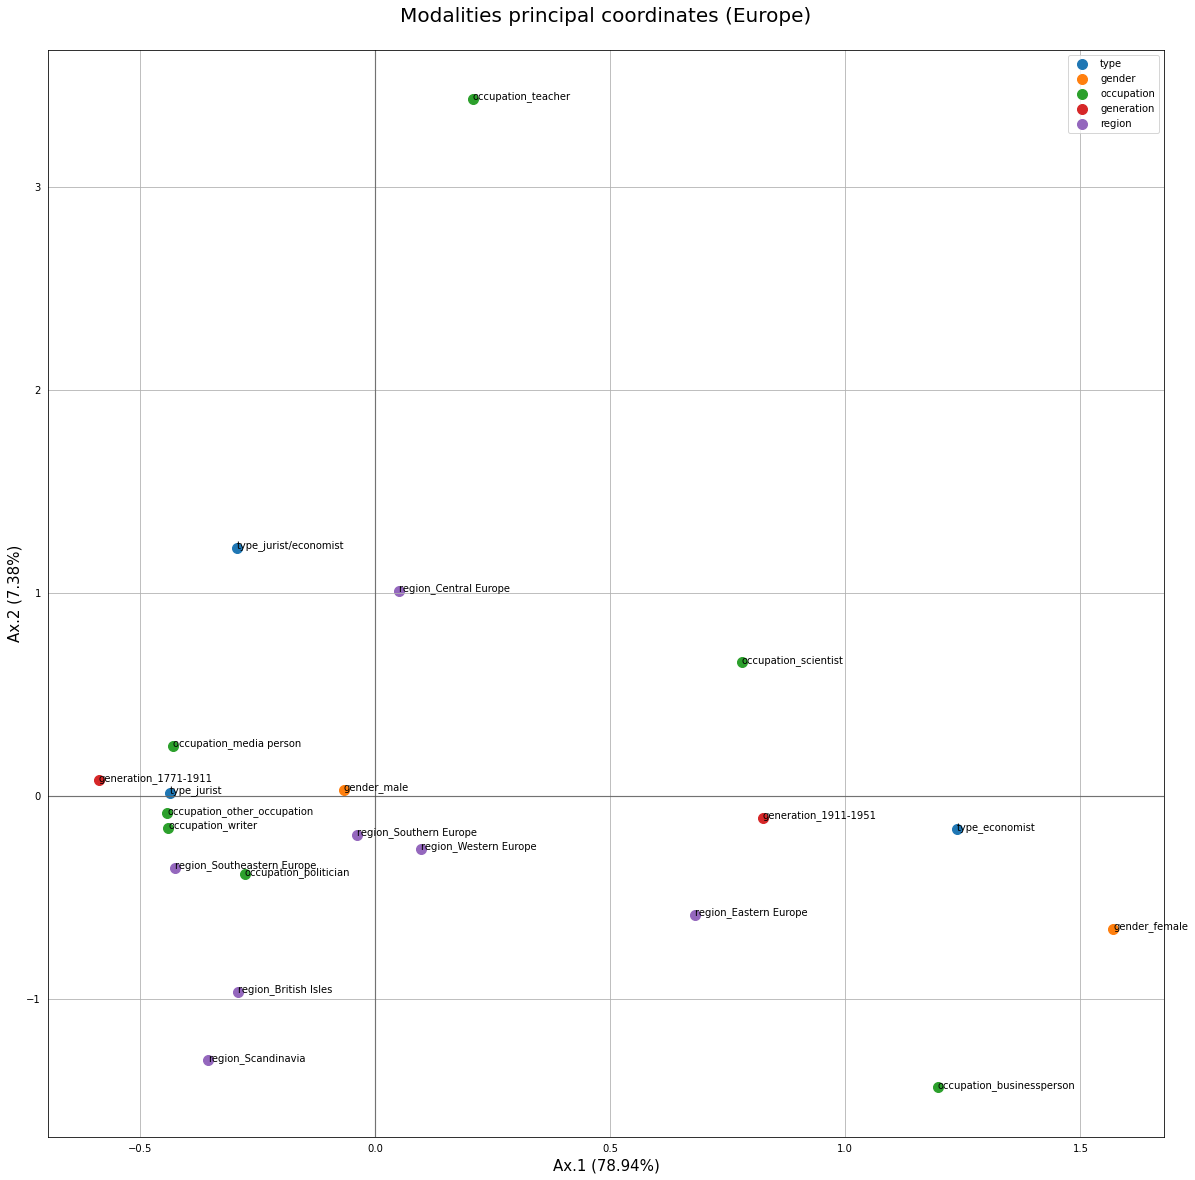

In [99]:
ax = mca_eu.plot_coordinates(X=D_euro, ax=None, figsize=(20, 20),
                         show_row_points=False, row_points_size=10,
                         row_points_alpha=0.5, show_row_labels=False,
                         show_column_points=True, column_points_size=100, show_column_labels=True,
                         legend_n_cols=1)
ax.set_title('Modalities principal coordinates (Europe)',  fontsize=20, y=1.02)
ax.set_xlabel("Ax.1 (78.94%)",  fontsize=15)
ax.set_ylabel("Ax.2 (7.38%)",  fontsize=15)
plt.show()

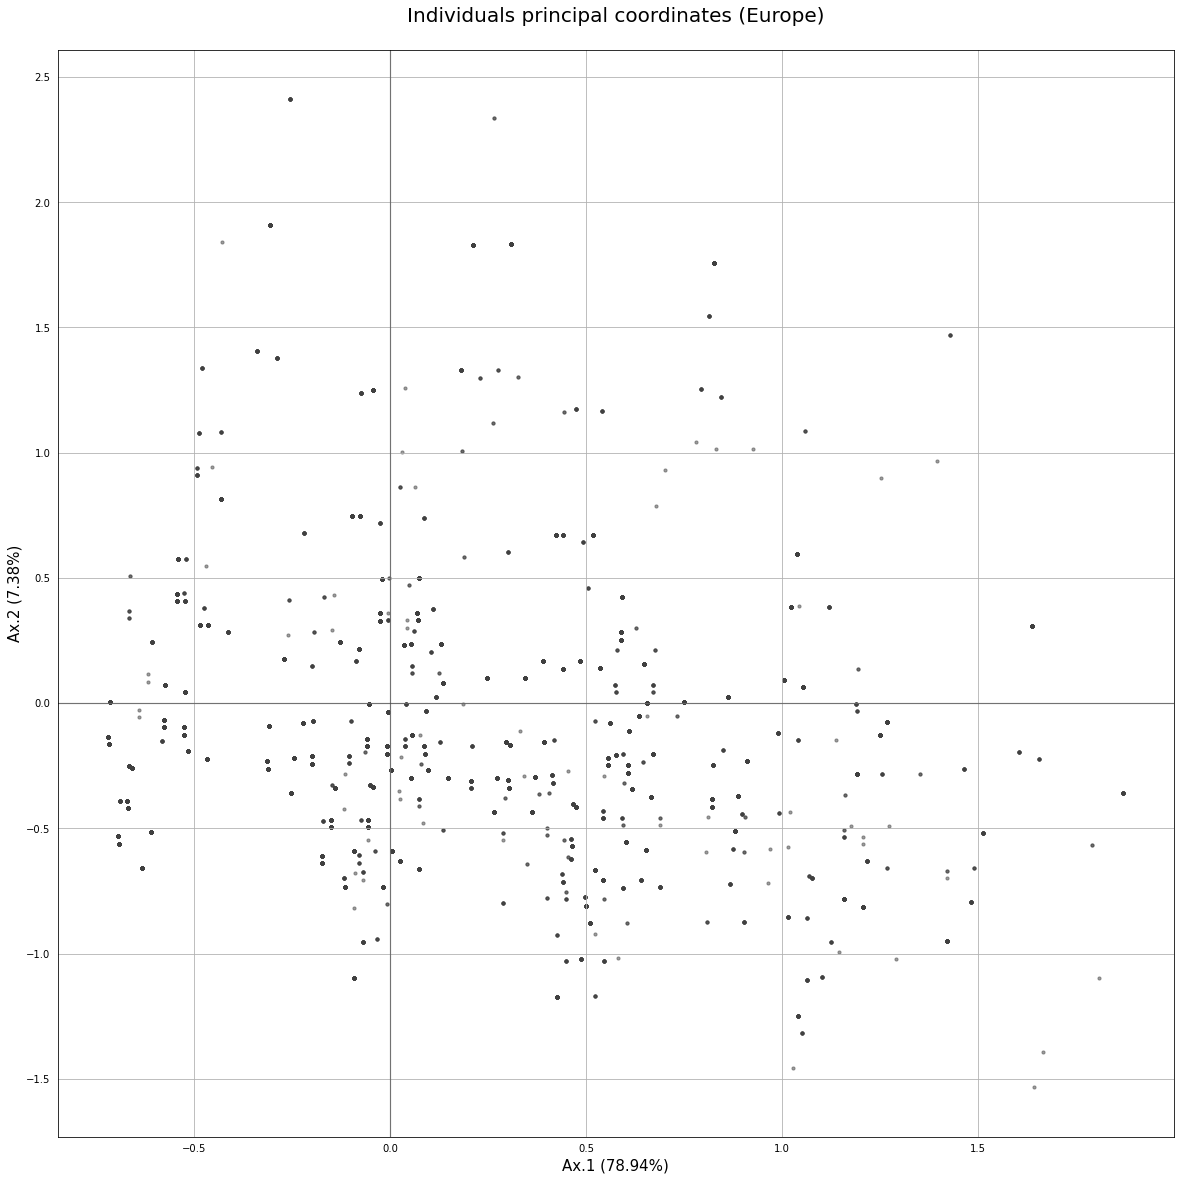

In [100]:
ax = mca_eu.plot_coordinates(X=D_euro, ax=None, figsize=(20, 20),
                         show_row_points=True, row_points_size=10,
                         row_points_alpha=0.5, show_row_labels=False,
                         show_column_points=False, column_points_size=100, show_column_labels=False,
                         legend_n_cols=1)
ax.set_title('Individuals principal coordinates (Europe)',  fontsize=20, y=1.02)
ax.set_xlabel("Ax.1 (78.94%)",  fontsize=15)
ax.set_ylabel("Ax.2 (7.38%)",  fontsize=15)
plt.show()

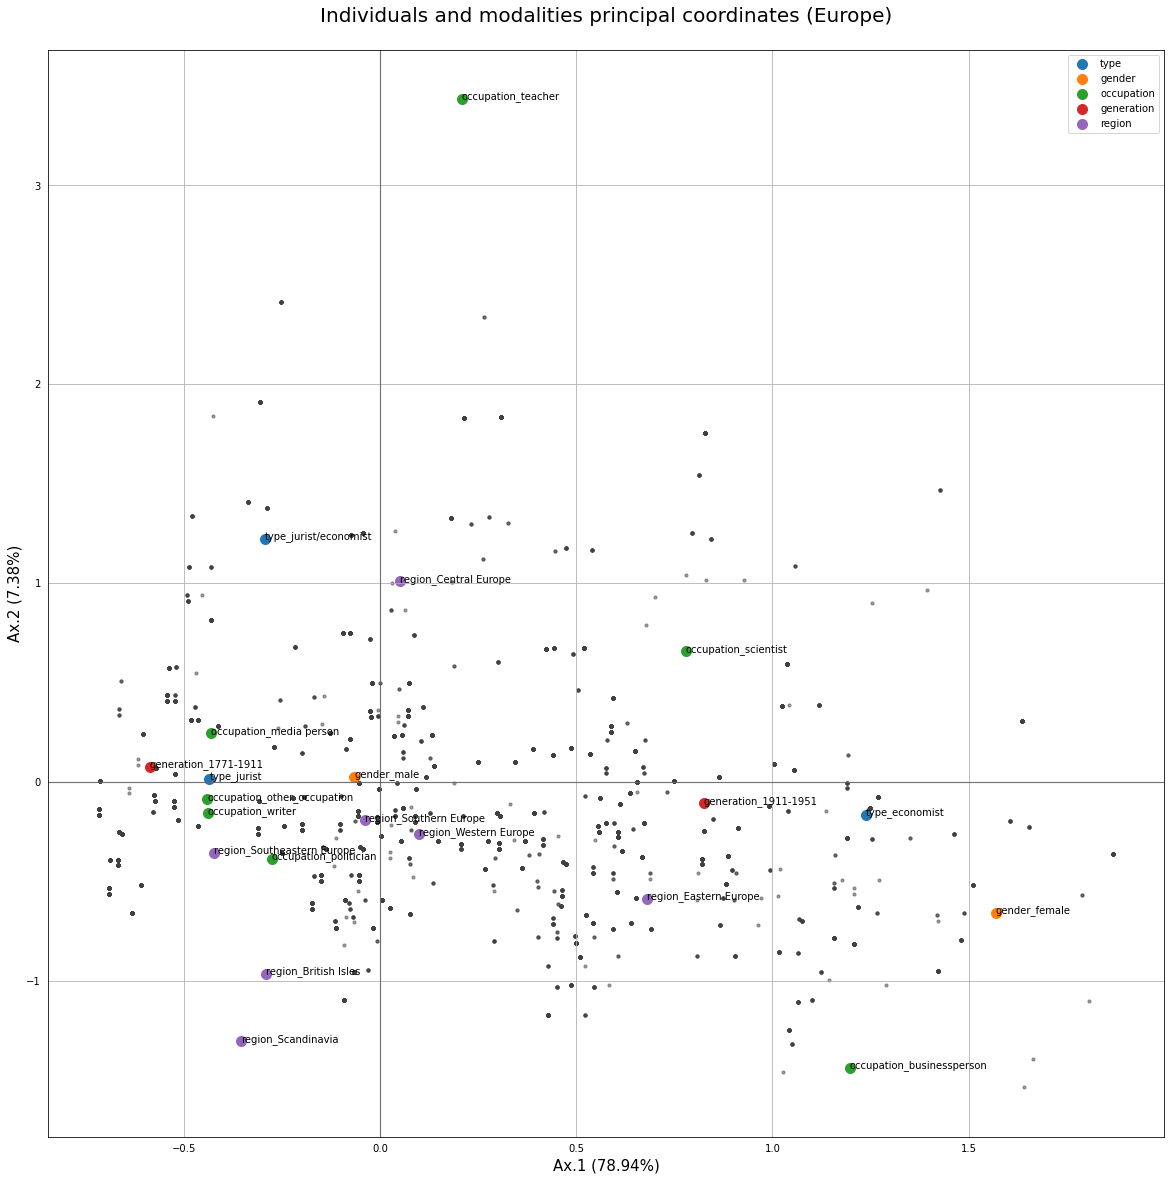

In [101]:
ax = mca_eu.plot_coordinates(X=D_euro, ax=None, figsize=(20, 20),
                         show_row_points=True, row_points_size=10,
                         row_points_alpha=0.5, show_row_labels=False,
                         show_column_points=True, column_points_size=100, show_column_labels=True,
                         legend_n_cols=1)
ax.set_title('Individuals and modalities principal coordinates (Europe)',  fontsize=20, y=1.02)
ax.set_xlabel("Ax.1 (78.94%)",  fontsize=15)
ax.set_ylabel("Ax.2 (7.38%)",  fontsize=15)
plt.show()

**Comments**:
* In this plot, some clusters appear (four) and are shaped like waves.
* The modalities are more around the left, near the "jurist" modality.
* The gender 'male' is at the center (the great individuals' majority have this modality.
* The 'teacher' modality is very far from the other modalities.
* The 'XIXth century' modality is opposite to the 'XXth century' modality, as between the 'jurist' modality and the 'economist' modality.
* Here, two European regions are close, Southern Europe and Western Europe. That means the individuals with these modalities share similar characteristics.